# Text Classification Exercise: Movie Reviews

## Introduction

This exercise uses the data from Kaggle's [IMDB Movie reviews](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition.

In this tutorial competition, we dig a little "deeper" into sentiment analysis. **Google's Word2Vec** is a deep-learning inspired method that focuses on the meaning of words. **Word2Vec attempts to understand meaning and semantic relationships among words**. It works in a way that is similar to deep approaches, such as recurrent neural nets or deep neural nets, but is computationally more efficient. This tutorial focuses on Word2Vec for **sentiment analysis**.

Sentiment analysis is a challenging subject in machine learning. People express their emotions in language that is often obscured by sarcasm, ambiguity, and plays on words, all of which could be very misleading for both humans and computers. In this tutorial we explore how Word2Vec can be applied to a similar problem.

## Data Set

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

**File descriptions**

- labeledTrainData - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review. This is available as **`labeledTrainData.tsv.zip`**
- testData - The test set. The tab-delimited file has a header row followed by 25,000 rows containing an id and text for each review. Your task is to predict the sentiment for each one. 
- unlabeledTrainData - An extra training set with no labels. The tab-delimited file has a header row followed by 50,000 rows containing an id and text for each review. 
- sampleSubmission - A comma-delimited sample submission file in the correct format.

### Data fields

- **id** - Unique ID of each review
- **sentiment** - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
- **review** - Text of the review

## Acknowledgements

This dataset was collected in association with the following publication:

Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). "Learning Word Vectors for Sentiment Analysis." The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011). (link)

Please email the author of that paper if you use the data for any research applications. The tutorial was developed by Angela Chapman during her summer 2014 internship at Kaggle.

## Metric

Submissions are judged on **area under the ROC curve**. 

### Submission Instructions

You should submit a comma-separated file with 25,000 row plus a header row. There should be 2 columns: "id" and "sentiment", which contain your binary predictions: 1 for positive reviews, 0 for negative reviews. For an example, see "sampleSubmission.csv" on the Data page. 

#### id,sentiment
- 123_45,0 
- 678_90,1
- 12_34,0

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_table('/Users/debajyotidas/Documents/GitHub/IMDB Reviews Sentiment Analysis using NLP Technques/Data/labeledTrainData.tsv.zip', header=None, names=['id','sentiment','review'])

In [14]:
data.shape

(25001, 3)

In [15]:
data.sample(n=5)

,id,sentiment,review
20001,3862_4,0,"I just watched it. A couple of laughs, but not..."
1172,4867_9,1,Disregard the plot and enjoy Fred Astaire doin...
6149,6381_1,0,This film is about a group of extra terrestria...
13741,2182_9,1,This superb film draws on a variety of talente...
18056,10873_4,0,Many people thought that this is a good movie ...


In [3]:
data.drop(columns='id')

,sentiment,review
0,sentiment,review
1,1,With all this stuff going down at the moment w...
2,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
3,0,The film starts with a manager (Nicholas Bell)...
4,0,It must be assumed that those who praised this...
...,...,...
24996,0,It seems like more consideration has gone into...
24997,0,I don't believe they made this film. Completel...
24998,0,"Guy is a loser. Can't get girls, needs to buil..."
24999,0,This 30 minute documentary Buñuel made in the ...


In [4]:
data.groupby('sentiment').count()

,id,review
sentiment,,
0,12500,12500
1,12500,12500
sentiment,1,1


In [5]:
#Dropping one odd sentiment stored as text
data.drop(data[data['sentiment']=='sentiment'].index,inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# split X and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data.review, data.sentiment, random_state=42)
#default split is 25% if neither test_size/train_size is mentioned

In [20]:
#Traing data
print(x_train.shape)
print(y_train.shape)

(18750,)
(18750,)


In [21]:
#Test Data
print(x_test.shape)
print(y_test.shape)

(6250,)
(6250,)


In [22]:
x_train.sample(n=5)

4759     Basic slasher movie premise, 3 young ladies wr...
2061     I sat through both parts of Che last night, ba...
13538    Before this little black-and-whiter, the touch...
7230     I read the novel 'Jane Eyre' for the first tim...
14669    A failure. The movie was just not good. It has...
Name: review, dtype: object

In [8]:
#Converting the dependent variable as Integer, so as to be able to use it in Deep Learning
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [9]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [10]:
#Creating a Lemmatizer for preprocessing
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [93]:
import re
from bs4 import BeautifulSoup

In [94]:
class PreProcessor:
    def __call__(self, doc):
        soup = BeautifulSoup(doc, "html.parser")
        stripped_text = soup.get_text()
        #Using regex
        text = re.sub(r'[^a-zA-z\s]', '', stripped_text)
        return text

Using **CountVectorizer** first

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(stop_words='english',preprocessor=PreProcessor(),tokenizer=LemmaTokenizer(),ngram_range=(1, 5),max_df=0.2,min_df=2,max_features=10000)
#max_df=0.2 means we ignore words which are present in more than 20% of documents
#min_df=0.01/10 means we ignore words which are present in less than 1%/10 documents

In [96]:
X_train_ct = cvect.fit_transform(x_train)

In [97]:
X_train_ct.shape

(18750, 10000)

In [98]:
len(cvect.vocabulary_)

10000

In [99]:
X_test_ct = cvect.transform(x_test)

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [106]:
#instantiate the model (with the default parameters)
mnb = MultinomialNB()

#fit the model with data (occurs in-place)
mnb.fit(X_train_ct, y_train)

MultinomialNB()

In [17]:
from sklearn import metrics

In [101]:
print ('Training accuracy of MultinomialNB using CountVectorizer',metrics.accuracy_score(y_train, mnb.predict(X_train_ct)))

Training accuracy of MultinomialNB using CountVectorizer 0.87456


In [102]:
print ('Testing accuracy of MultinomialNB using CountVectorizer',metrics.accuracy_score(y_test, mnb.predict(X_test_ct)))

Testing accuracy of MultinomialNB using CountVectorizer 0.8488


In [103]:
cr=metrics.classification_report(y_test,mnb.predict(X_test_ct))
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3092
           1       0.85      0.85      0.85      3158

    accuracy                           0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.85      0.85      0.85      6250



In [104]:
mnb_probs = mnb.predict_proba(X_test_ct)
mnb_probs=mnb_probs[:,1] #Keeping probabilities of only 1 sentiment
metrics.roc_auc_score(y_test,mnb_probs)

0.9193676996019063

Using **TfIdfVectorizer** now

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english',preprocessor=PreProcessor(),tokenizer=LemmaTokenizer(),ngram_range=(1, 5),max_df=0.2,min_df=2,max_features=10000)

In [108]:
X_train_tfidf = tfidf.fit_transform(x_train)

In [109]:
len(tfidf.vocabulary_)

10000

In [110]:
X_train_tfidf.shape

(18750, 10000)

In [111]:
X_test_tfidf = tfidf.transform(x_test)

In [112]:
#fit the model with data (occurs in-place)
mnb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [113]:
print ('Training accuracy of MultinomialNB using TfIdfVectorizer',metrics.accuracy_score(y_train, mnb.predict(X_train_tfidf)))

Training accuracy of MultinomialNB using TfIdfVectorizer 0.8869333333333334


In [114]:
print ('Testing accuracy of MultinomialNB using TfIdfVectorizer',metrics.accuracy_score(y_test, mnb.predict(X_test_tfidf)))

Testing accuracy of MultinomialNB using TfIdfVectorizer 0.85696


In [115]:
cr=metrics.classification_report(y_test,mnb.predict(X_test_tfidf))
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3092
           1       0.85      0.87      0.86      3158

    accuracy                           0.86      6250
   macro avg       0.86      0.86      0.86      6250
weighted avg       0.86      0.86      0.86      6250



In [116]:
mnb_probs = mnb.predict_proba(X_test_tfidf)
mnb_probs=mnb_probs[:,1] #Keeping probabilities of only 1 sentiment
metrics.roc_auc_score(y_test,mnb_probs)

0.9332265250494236

In [117]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=100,criterion='entropy',oob_score=True,random_state=42)

In [118]:
#fit the model with data (occurs in-place)
rfcl.fit(X_train_tfidf, y_train)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=42)

In [119]:
print ('Testing accuracy of RandomForestClassifier using TfIdfVectorizer',metrics.accuracy_score(y_test, rfcl.predict(X_test_tfidf)))

Testing accuracy of RandomForestClassifier using TfIdfVectorizer 0.84176


In [120]:
cr=metrics.classification_report(y_test,rfcl.predict(X_test_tfidf))
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3092
           1       0.85      0.84      0.84      3158

    accuracy                           0.84      6250
   macro avg       0.84      0.84      0.84      6250
weighted avg       0.84      0.84      0.84      6250



In [121]:
rfcl_probs = rfcl.predict_proba(X_test_tfidf)
rfcl_probs=rfcl_probs[:,1] #Keeping probabilities of only 1 sentiment
metrics.roc_auc_score(y_test,rfcl_probs)

0.9211304561732375

In [122]:
import tensorflow as tf

In [123]:
tf.keras.backend.clear_session()
model1 = tf.keras.Sequential()

In [124]:
#Add hidden layers
model1.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(len(tfidf.vocabulary_),)))
#model1.add(tf.keras.layers.Dropout(0.4))
model1.add(tf.keras.layers.Dense(50, activation='relu'))
#model1.add(tf.keras.layers.Dropout(0.4))
#Add Output layer
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000100   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 1,005,201
Trainable params: 1,005,201
Non-trainable params: 0
_________________________________________________________________


In [125]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [126]:
hist_tfidf=model1.fit(X_train_tfidf.todense(), y_train,
                     validation_data=(X_test_tfidf.todense(), y_test), 
                     epochs=10, batch_size=32)

Epoch 1/10
586/586 [==============================] - 16s 28ms/step - loss: 0.3502 - accuracy: 0.8526 - val_loss: 0.2974 - val_accuracy: 0.8742
Epoch 2/10
586/586 [==============================] - 10s 18ms/step - loss: 0.1638 - accuracy: 0.9386 - val_loss: 0.3407 - val_accuracy: 0.8677
Epoch 3/10
586/586 [==============================] - 12s 21ms/step - loss: 0.0821 - accuracy: 0.9698 - val_loss: 0.4480 - val_accuracy: 0.8634
Epoch 4/10
586/586 [==============================] - 14s 24ms/step - loss: 0.0315 - accuracy: 0.9892 - val_loss: 0.5895 - val_accuracy: 0.8606
Epoch 5/10
586/586 [==============================] - 12s 20ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.8172 - val_accuracy: 0.8594
Epoch 6/10
586/586 [==============================] - 10s 18ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.9439 - val_accuracy: 0.8605
Epoch 7/10
586/586 [==============================] - 16s 27ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 1.0593 - val_accuracy:

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

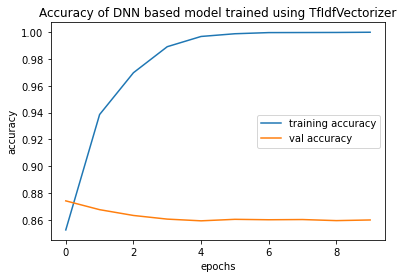

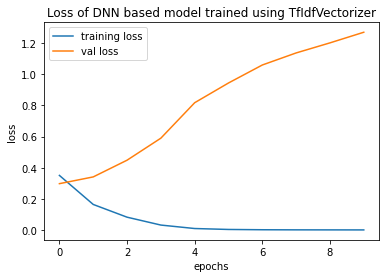

In [128]:
plt.figure(0)
plt.plot(hist_tfidf.history['accuracy'], label='training accuracy')
plt.plot(hist_tfidf.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy of DNN based model trained using TfIdfVectorizer')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(hist_tfidf.history['loss'], label='training loss')
plt.plot(hist_tfidf.history['val_loss'], label='val loss')
plt.title('Loss of DNN based model trained using TfIdfVectorizer')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [129]:
model1_probs = model1.predict(X_test_tfidf.todense())
metrics.roc_auc_score(y_test,model1_probs)

0.9307216953268439

Using **Word2Vec** Tokenizer

In [130]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000) # num_words -> Vocablury size

In [131]:
#Fit tokenizer with actual training data
tokenizer.fit_on_texts(x_train.tolist())

In [132]:
#Replace each word in the text with word's index
X_train = tokenizer.texts_to_sequences(x_train.tolist())

In [133]:
X_test = tokenizer.texts_to_sequences(x_test)

In [134]:
len(X_train[123])

606

In [135]:
#Define maximum number of words to consider in each review
max_review_length = 300

In [136]:
#Pad training and test reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        maxlen=max_review_length,
                                                        padding='pre',
                                                        truncating='pre')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, 
                                                       maxlen=max_review_length, 
                                                       padding='pre',
                                                       truncating='pre')

Using **Glove**

In [137]:
import gensim.downloader as api

In [138]:
#Load Glove model (similar to Word2Vec)
glove = api.load('glove-wiki-gigaword-50')

In [139]:
#Embedding length based on selected model - we are using 50d here.
embedding_vector_length = glove.vector_size
desired_vocab_size=10000

In [140]:
#Initialize embedding matrix for our dataset with 10000+1 rows (1 for padding word)
#and 50 columns (as embedding size is 50)
embedding_matrix = np.zeros((desired_vocab_size + 1, embedding_vector_length))

In [141]:
for word, i in sorted(tokenizer.word_index.items(),key=lambda x:x[1]):
    if i > (desired_vocab_size+1):
        break
    try:
        embedding_vector = glove[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix[i] = embedding_vector
    except:
        pass

In [142]:
#Initialize model
tf.keras.backend.clear_session()
model3 = tf.keras.Sequential()

In [143]:
model3.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

In [144]:
#Add first convolutional layer with 32 kernels
model3.add(tf.keras.layers.Conv1D(32, kernel_size=(3),strides=1))
#normalize data
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.ReLU())
#Add second convolutional layer with 64 kernels
model3.add(tf.keras.layers.Conv1D(64, kernel_size=(3), strides=2))
#normalize data
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.ReLU())

In [145]:
#Use Global Average Pooling
model3.add(tf.keras.layers.GlobalAveragePooling1D())

#Output layer
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           500050    
_________________________________________________________________
conv1d (Conv1D)              (None, 298, 32)           4832      
_________________________________________________________________
batch_normalization (BatchNo (None, 298, 32)           128       
_________________________________________________________________
re_lu (ReLU)                 (None, 298, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 148, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 64)           256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 148, 64)           0

In [146]:
#Compile the model
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [147]:
hist_glove=model3.fit(X_train,y_train,epochs=5,batch_size=32,validation_data=(X_test, y_test))

Epoch 1/5
586/586 [==============================] - 39s 66ms/step - loss: 0.5104 - accuracy: 0.7586 - val_loss: 0.4649 - val_accuracy: 0.7882
Epoch 2/5
586/586 [==============================] - 29s 50ms/step - loss: 0.4245 - accuracy: 0.8144 - val_loss: 0.4179 - val_accuracy: 0.8170
Epoch 3/5
586/586 [==============================] - 24s 41ms/step - loss: 0.3980 - accuracy: 0.8292 - val_loss: 0.4099 - val_accuracy: 0.8187
Epoch 4/5
586/586 [==============================] - 25s 43ms/step - loss: 0.3829 - accuracy: 0.8347 - val_loss: 0.5281 - val_accuracy: 0.7483
Epoch 5/5
586/586 [==============================] - 23s 39ms/step - loss: 0.3697 - accuracy: 0.8415 - val_loss: 0.4064 - val_accuracy: 0.8221


In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

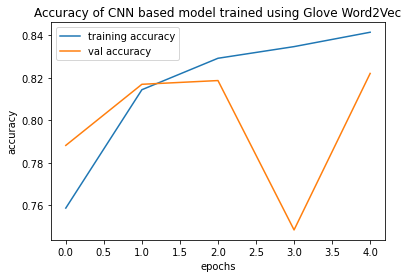

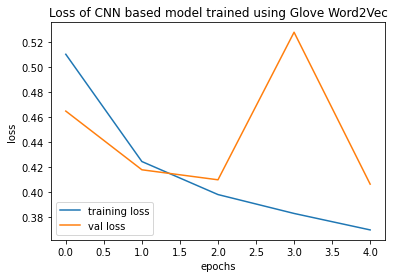

In [149]:
plt.figure(0)
plt.plot(hist_glove.history['accuracy'], label='training accuracy')
plt.plot(hist_glove.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy of CNN based model trained using Glove Word2Vec')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(hist_glove.history['loss'], label='training loss')
plt.plot(hist_glove.history['val_loss'], label='val loss')
plt.title('Loss of CNN based model trained using Glove Word2Vec')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [150]:
model1_probs = model1.predict(X_test_tfidf.todense())
metrics.roc_auc_score(y_test,model1_probs)

0.9307216953268439

In [151]:
test_data = pd.read_table('/Users/debajyotidas/Documents/GitHub/IMDB Reviews Sentiment Analysis using NLP Technques/Data/testData.tsv.zip',header=None,names=['id','review'],sep='\t')

In [152]:
test_phrase = tokenizer.texts_to_sequences(test_data['review'])
test_phrase = tf.keras.preprocessing.sequence.pad_sequences(test_phrase,maxlen=max_review_length, padding='pre',truncating='pre')

In [153]:
test_predict = model3.predict(test_phrase)

In [154]:
test_predict.shape

(25001, 1)

In [155]:
predictions = []
for val in test_predict:
    predictions.append(np.argmax(val))

In [156]:
id = test_data['id'].values

In [157]:
final_answer = pd.DataFrame({'id':id,'sentiment':predictions})

In [158]:
filename = 'IMDB_SentiMentAnalysis_output.csv'
final_answer.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: IMDB_SentiMentAnalysis_output.csv
